In [2]:
#import necessary libraries
import numpy as np
import math
from matplotlib import pyplot as plt

In [187]:
#function for mapping image indices to filter indices for cross-correlation and convolution
#accepts four parameters: the point in the image to be filtered, the size of the filter, size of the image and type of operation
#if opType is True, the operation performed is cross-correlation, otherwise it is convolution
#returns a list of tuples containing pairs of image coordinate indices and filter indices which correspond to each other
def findOperationIndexPairs(idx, n, s, opType):
    indexPairs = []
    sides = int(math.floor(n/2))
    ind_x = idx[0] - sides
    if opType:
        for i in range(n):
            ind_y = idx[1] - sides
            for j in range(n):
                tp1 = (ind_x, ind_y)
                tp2 = (i, j)
                indexPairs.append((tp1, tp2))
                ind_y += 1
            ind_x += 1
    else:
        for i in range(n-1, -1, -1):
            ind_y = idx[1] - sides
            for j in range(n-1, -1, -1):
                tp1 = (ind_x, ind_y)
                tp2 = (i, j)
                indexPairs.append((tp1, tp2))
                ind_y += 1
            ind_x += 1
    newPairs = []
    for ip in indexPairs:
        if ip[0][0] < 0 or ip[0][1] < 0 or ip[0][0] >= s or ip[0][1] >= s:
            continue
        else:
            newPairs.append(ip)
    return newPairs

In [109]:
#pad an image on all sides with all zeros
#requires the image and padding size as input
#returns the padded image
def pad_array(arr, p_size):
    zr_y = np.zeros(p_size, dtype=int)
    for i in range(len(arr)):
        padded = np.concatenate((zr_y, arr[i], zr_y))
        arr[i] = padded
    zr_x = np.zeros(len(arr[0]), dtype=int)
    for p in range(p_size):
        arr.insert(0, zr_x)
        arr.append(zr_x)
    return arr

In [197]:
#convolve an image with a filter
#image is first padded according to the filter size
#pairs of coordinates to apply the filter at each pixel are calculated
#convolution is then applied based on these coordinate pairs for each pixel
def convolution(f, I):
    f_size = len(f)
    pad_size = int((f_size - 1)/2)
    padded_arr = np.pad(I, [(pad_size,), (pad_size,)], mode='constant')
    img_size = len(padded_arr)
    im_conv = padded_arr.copy()
    for i in range(img_size):
        for j in range(img_size):
            indices = findOperationIndexPairs((i, j), f_size, img_size, False)
            sum_pixels = 0
            for pairs in indices:
                x_img = pairs[0][0]
                y_img = pairs[0][1]
                x_filter = pairs[1][0]
                y_filter = pairs[1][1]
                sum_pixels += padded_arr[x_img][y_img] * f[x_filter][y_filter]
            im_conv[i][j] = sum_pixels
    return im_conv

In [111]:
#code copied from the class demo for creating the gaussian filter
def create_gaussian_filter(sigma):
    
    # How to choose size n
    n = 2*math.floor(sigma*3)+1
    # Precompute sigma*sigma
    sigma2 = sigma*sigma
    
    # Create a coordinate sampling from -n/2 to n/2 so that (0,0) will be at the center of the filter
    x = np.linspace(-n/2.0, n/2.0, n)
    y = np.linspace(-n/2.0, n/2.0, n)
    
    # Blank array for the Gaussian filter
    gaussian_filter = np.zeros((n,n))

    # Loop over all elements of the filter
    for i in range(0, len(x)):
        for j in range(0, len(y)):
            
            # Use the x and y coordinate sampling as the inputs to the 2D Gaussian function
            gaussian_filter[i,j] = (1/(2*math.pi*sigma2))*math.exp(-(x[i]*x[i]+y[j]*y[j])/(2*sigma2))
      
    # Normalize so the filter sums to 1
    return gaussian_filter/np.sum(gaussian_filter.flatten())

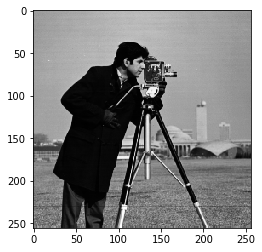

In [99]:
#show original image
plt.imshow(img, cmap="gray")

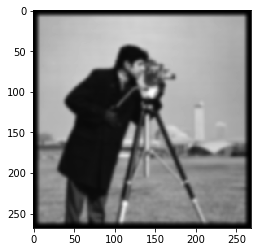

In [199]:
#convolve image with gaussian filter, with sigma set to 2
#show denoised image
g2 = create_gaussian_filter(2)
convolved_img = convolution(g2, img)
plt.imshow(convolved_img, cmap="gray")

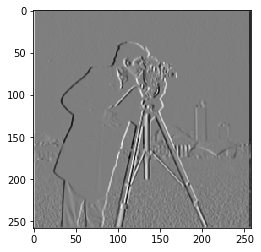

In [198]:
#apply sobel filter to obtain image derivative with respect to the x-axis
#display derivative image
deriv_filter = np.asarray([[1.0,0.0,-1.0],[2.0,0.0,-2.0],[1.0,0.0,-1.0]])
deriv_img_x = convolution(deriv_filter, img)
plt.imshow(deriv_img_x, cmap="gray")

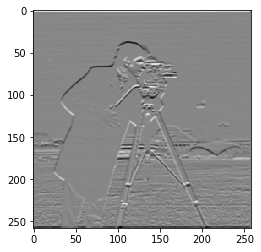

In [200]:
#reapply convolution with the transposed sobel filter
#to calculate and display the derivative image with respect to the y-axis
deriv_img_y = convolution(np.transpose(deriv_filter), img)
plt.imshow(deriv_img_y, cmap="gray")

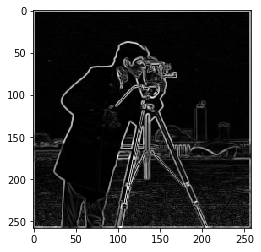

In [205]:
#caclulate gradient magnitude via formula with both derivative images
gx = np.square(deriv_img_x)
gy = np.square(deriv_img_y)
g_mag = np.sqrt(np.add(gx, gy))
plt.imshow(g_mag, cmap="gray")

In [209]:
#convert gradient magnitude image to binary via thresholding
#accepts two parameters, magnitude for gradient mag image t for threshold
#returns binary image showcasing edges
def edge_detector(magnitude, t):
    edges = magnitude.copy()
    for i in range(len(g_mag)):
        for j in range(len(g_mag)):
            if g_mag[i][j] >= t:
                edges[i][j] = 1
            else:
                edges[i][j] = 0
    return edges

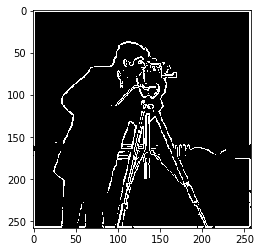

In [211]:
#display binary image with threshold set at 1.5
test1 = edge_detector(g_mag, 1.5)
plt.imshow(test1, cmap="gray")

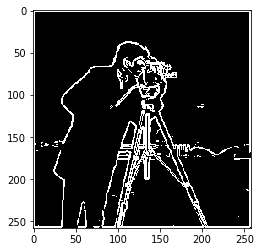

In [212]:
#second test with threshold at 1
test1 = edge_detector(g_mag, 1)
plt.imshow(test1, cmap="gray")

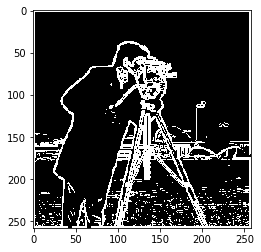

In [213]:
#final test with threshold set to 0.5
test1 = edge_detector(g_mag, 0.5)
plt.imshow(test1, cmap="gray")